# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [187]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%matplotlib inline

In [188]:
# load messages dataset
messages_raw = pd.read_csv('disaster_messages.csv')
messages_raw

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
...,...,...,...,...
26243,30261,The training demonstrated how to enhance micro...,NaN,news
26244,30262,A suitable candidate has been selected and OCH...,NaN,news
26245,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news
26246,30264,"Some 2,000 women protesting against the conduc...",NaN,news


In [189]:
#Rename columns and remove duplicates for messages data
messages = messages_raw.rename(index=str, columns={'id':'message_id'})
messages = messages.drop_duplicates()
messages

,message_id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
...,...,...,...,...
26243,30261,The training demonstrated how to enhance micro...,NaN,news
26244,30262,A suitable candidate has been selected and OCH...,NaN,news
26245,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news
26246,30264,"Some 2,000 women protesting against the conduc...",NaN,news


In [190]:
diff_msgs_same_id = messages.groupby('message_id').agg(lambda x: len(x)).message.reset_index().query('message > 1')
diff_msgs_same_id

,message_id,message


As we can see, there are no cases of different messages with the same id.

In [191]:
# load categories dataset and remove duplicates
categories_raw = pd.read_csv('disaster_categories.csv').drop_duplicates()
categories_raw

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
...,...,...
26243,30261,related-0;request-0;offer-0;aid_related-0;medi...
26244,30262,related-0;request-0;offer-0;aid_related-0;medi...
26245,30263,related-1;request-0;offer-0;aid_related-0;medi...
26246,30264,related-1;request-0;offer-0;aid_related-1;medi...


In [192]:
#Rename columns and remove duplicates for categories data
categories = categories_raw.rename(index=str, columns={'id':'message_id'})
categories = categories.drop_duplicates()
categories

,message_id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
...,...,...
26243,30261,related-0;request-0;offer-0;aid_related-0;medi...
26244,30262,related-0;request-0;offer-0;aid_related-0;medi...
26245,30263,related-1;request-0;offer-0;aid_related-0;medi...
26246,30264,related-1;request-0;offer-0;aid_related-1;medi...


In [193]:
duplicated_msg_cats = categories.groupby('message_id').agg(lambda x: len(x)).reset_index().query('categories > 1')
print(duplicated_msg_cats.shape)
duplicated_msg_cats

(36, 2)


,message_id,categories
162,202,2
707,862,2
1404,1652,2
2818,3250,2
3366,3882,2
4331,4956,2
4511,5153,2
5057,5776,2
5590,6393,2
5679,6492,2


In [194]:
duplicated_cats_case = categories[categories['message_id'] == 27768]['categories'].tolist()
cats_1 = set(duplicated_cats_case[0].split(';'))
cats_2 = set(duplicated_cats_case[1].split(';'))

In [195]:
print(cats_1.difference(cats_2))
print(cats_2.difference(cats_1))

{'military-1', 'aid_related-1'}
{'military-0', 'aid_related-0'}


As we can see, there are 36 messages with the same id but different category assignments. The correct assignment could be done manually but would be subject to human error as there is no specialist for consultation. Thus, I decided to drop such messages from the dataset.

In [196]:
#Remove messages with duplicated category assignments from messages data
print(messages.shape)
messages = messages[~messages['message_id'].isin(duplicated_msg_cats['message_id'])]
print(messages.shape)
messages

(26180, 4)
(26144, 4)


,message_id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
...,...,...,...,...
26243,30261,The training demonstrated how to enhance micro...,NaN,news
26244,30262,A suitable candidate has been selected and OCH...,NaN,news
26245,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news
26246,30264,"Some 2,000 women protesting against the conduc...",NaN,news


In [197]:
#Remove messages with duplicated category assignments from categories data
print(categories.shape)
categories = categories[~categories['message_id'].isin(duplicated_msg_cats['message_id'])]
print(categories.shape)
categories

(26216, 2)
(26144, 2)


,message_id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
...,...,...
26243,30261,related-0;request-0;offer-0;aid_related-0;medi...
26244,30262,related-0;request-0;offer-0;aid_related-0;medi...
26245,30263,related-1;request-0;offer-0;aid_related-0;medi...
26246,30264,related-1;request-0;offer-0;aid_related-1;medi...


### 2. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [198]:
# create a dataframe of the 36 individual category columns
categories_wide = categories.categories.str.split(';', expand=True)
categories_wide.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [199]:
# select the first row of the categories dataframe
row = categories_wide.head(1)
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x.str.slice(stop=-2)).values[0].tolist()
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [200]:
# rename the columns of `categories`
categories_wide.columns = category_colnames
categories_wide.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 3. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [201]:
for column in category_colnames:
    # set each value to be the last character of the string
    categories_wide[column] = categories_wide[column].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories_wide[column] = categories_wide[column].astype(int)
categories_wide

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26246,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Create `categories_wide` and `categories_long` DataFrame for better data processing.

In [204]:
categories_wide = pd.concat([categories.message_id,categories_wide], axis=1)
categories_wide

,message_id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26243,30261,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26244,30262,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26245,30263,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26246,30264,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [205]:
categories_long = pd.melt(categories_wide, id_vars=['message_id'], var_name='category')
categories_long = categories_long[categories_long['value'] == 1].drop('value', axis=1)
categories_long

,message_id,category
0,2,related
1,7,related
2,8,related
3,9,related
4,12,related
...,...,...
941099,30169,direct_report
941149,30227,direct_report
941165,30245,direct_report
941166,30246,direct_report


### 2. Merge datasets, creating `messages_wide` and `messages_long` dataframes
- Merge the messages and categories datasets using the common id

In [206]:
messages_wide = pd.merge(messages, categories_wide, on='message_id')
messages_wide

,message_id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26139,30261,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26140,30262,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26141,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26142,30264,"Some 2,000 women protesting against the conduc...",NaN,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
messages_long = pd.merge(messages, categories_long, on='message_id')
messages_long

,message_id,message,original,genre,category
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related
2,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,aid_related
3,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,other_aid
4,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,weather_related
...,...,...,...,...,...
82662,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,related
82663,30264,"Some 2,000 women protesting against the conduc...",NaN,news,related
82664,30264,"Some 2,000 women protesting against the conduc...",NaN,news,aid_related
82665,30264,"Some 2,000 women protesting against the conduc...",NaN,news,military


### 7. Perform Some Data Exploration

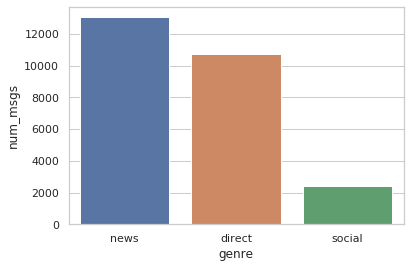

In [128]:
messages_per_genre = messages_wide.genre.value_counts().rename_axis('genre').reset_index(name='num_msgs')
sns.set(style="whitegrid")
sns.barplot(x="genre", y="num_msgs", data=messages_per_genre);

In [208]:
num_msgs_per_cat = messages_long.category.value_counts().rename_axis('category').reset_index(name='num_msgs')
num_msgs_per_cat

,category,num_msgs
0,related,19844
1,aid_related,10822
2,weather_related,7272
3,direct_report,5055
4,request,4453
5,other_aid,3434
6,food,2911
7,earthquake,2449
8,storm,2437
9,shelter,2303


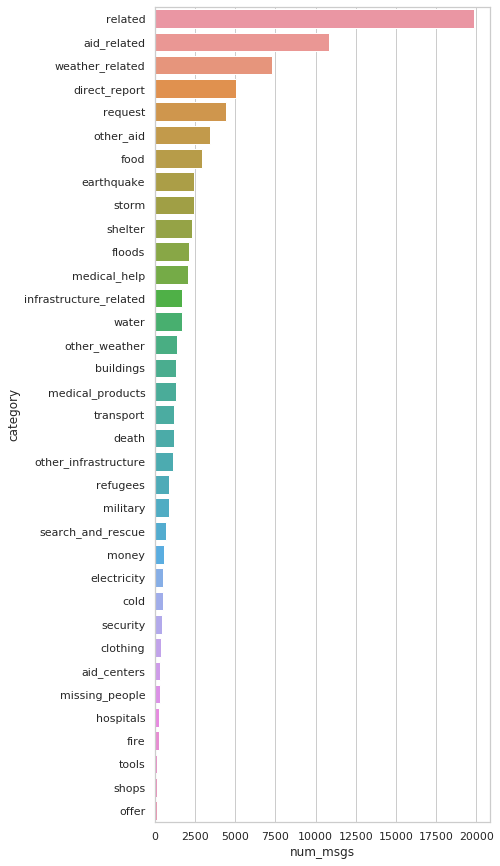

In [209]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_msgs", y="category", data=num_msgs_per_cat);

In [210]:
def count_words(messages):
    num_words_per_message = messages.apply(lambda x: len(x.split(' ')))
    return num_words_per_message.median()

word_counts_by_category = messages_long.groupby('category').message.agg(lambda x: count_words(x)).reset_index(name='num_words')
word_counts_by_category

,category,num_words
0,aid_centers,26.0
1,aid_related,24.0
2,buildings,26.0
3,clothing,24.0
4,cold,26.0
5,death,28.0
6,direct_report,20.0
7,earthquake,20.0
8,electricity,24.0
9,fire,26.0


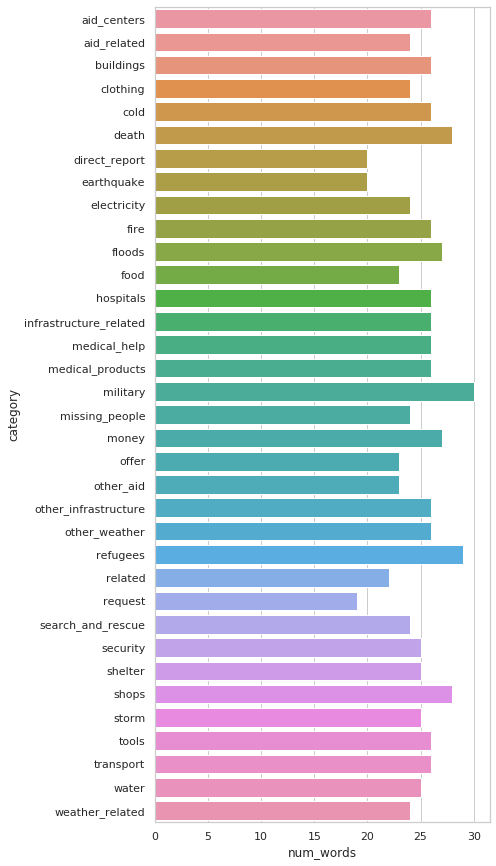

In [211]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_words", y="category", data=word_counts_by_category);

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [212]:
message_categories = categories_long.rename(index=str, columns={'id':'message_id'})
message_categories

,message_id,category
0,2,related
1,7,related
2,8,related
3,9,related
4,12,related
...,...,...
941099,30169,direct_report
941149,30227,direct_report
941165,30245,direct_report
941166,30246,direct_report


In [213]:
messages_raw

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
...,...,...,...,...
26243,30261,The training demonstrated how to enhance micro...,NaN,news
26244,30262,A suitable candidate has been selected and OCH...,NaN,news
26245,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news
26246,30264,"Some 2,000 women protesting against the conduc...",NaN,news


In [215]:
engine = create_engine('sqlite:///DisasterResponse.db')
messages.to_sql('Message', engine, index=False, if_exists='replace')
categories_wide.to_sql('MessageCategoryWide', engine, index=False, if_exists='replace')
categories_long.to_sql('MessageCategoryLong', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.